In [1]:
%config InlineBackend.figure_formats = ['svg']
%run ../coronavirus.py

# 13 April 2020

- Some plots look a little suspicous /  misleading
- lots of noise
- code base could do with refactoring
- explore that here

Get some test data

In [2]:
country = "Germany"
region, subregion = None, None
c, d = get_country_data(country, region=region, subregion=subregion)
if False:
    c2 = c.drop(c[c.index > '2020-03-15'].index)
    d2 = d.drop(d[d.index > '2020-03-15'].index)
    # c2.loc['2020-04-01'] =  np.nan # c2.loc['2020-03-31']
    c2 = c2.dropna()
else:
    c2 = c
    d2 = d
c2.country = country
c2.label = c.label
d2.label = d.label
d2.country = d.country


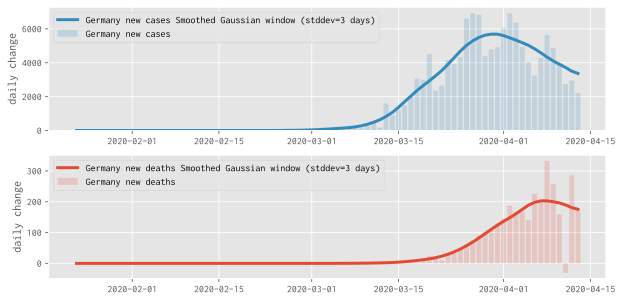

In [4]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), sharex=False)
ax = axes[0]
# ax.set_ylim([-50, 200])
plot_daily_change(ax=ax, series=c2, color="C1");
ax = axes[1]

plot_daily_change(ax=ax, series=d2, color="C0")

In [7]:
# Source code used to develop plot_grow_factor; migth be convenient to play with

def plot_growth_factor_dev(ax, series, color, minchange=10):
    """relative change of number of new cases/deaths from day to day
    See https://youtu.be/Kas0tIxDvrg?t=330, 5:30 onwards
    """
    # only keep values where there is a change of a minumum number
    
    country, label = series.country, series.label
    
    # get smooth data from plot 1 to base this plot on
    (change, change_label) , (smooth, smooth_label), \
        (smooth2, smooth2_label) = compute_daily_change(series)

    
    # Compute data points
    f = smooth.pct_change() + 1  # compute ratio of subsequent daily changes

    # division by zero may lead to np.inf in the data: get rid of that
    f.replace(np.inf, np.nan, inplace=True)  # seems not to affect plot
    
    # Compute smoother version for line in plots
    rolling = f.rolling(7, center=True, win_type='gaussian', min_periods=3).mean(std=2)
    
    label = series.country + " " + series.label + " growth factor (based on smooth daily change)"
    ax.plot(f.index, f.values, 'o', color=color, alpha=0.3, label=label)

    label = series.country + " " + series.label + " smoothed growth factor"
    ax.plot(rolling.index, rolling.values, '-', color=color, label=label, linewidth=LW)

    ax.legend()
    ax.set_ylabel("growth factor")
    ax.set_ylim(0.5, 1.5)  # should generally be below 1
    ax.plot([series.index.min(), series.index.max()], [1.0, 1.0], '-C3') # label="critical value"
    return ax


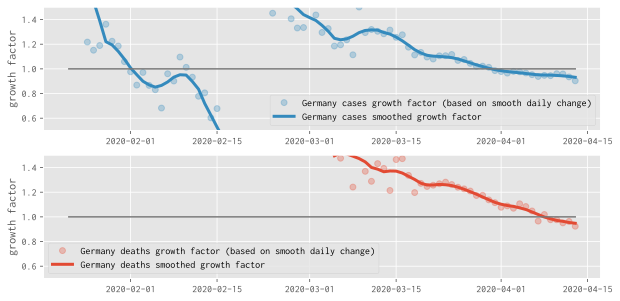

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), sharex=False)
ax = axes[0]
plot_growth_factor_dev(ax=ax, series=c2, color="C1");
ax = axes[1]
plot_growth_factor_dev(ax=ax, series=d2, color="C0");

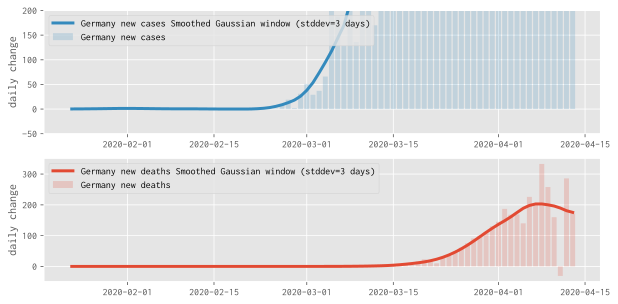

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), sharex=False)
ax = axes[0]
ax.set_ylim([-50, 200])
plot_daily_change(ax=ax, series=c2,color="C1")
ax = axes[1]

plot_daily_change(ax=ax, series=d2, color="C0")

In [14]:
country = "Germany"
region, subregion = None, None
c, d = get_country_data(country, region=region, subregion=subregion)
c2 = c.drop(c[c.index < '2020-03-15'].index)
d2 = d.drop(d[d.index < '2020-03-15'].index)
c2.loc['2020-04-01'] =  np.nan # c2.loc['2020-03-31']
c2 = c2.dropna()

c2.country = country
c2 = c.drop(c[c.index < '2020-03-15'].index)
d2 = d.drop(d[d.index < '2020-03-15'].index)
c2.country = c.country
d2.country = d.country
c2.label = c.label
d2.label = d.label


In [18]:
def overview(country, region=None, subregion=None, savefig=False):

    c, d = get_country_data(country, region=region, subregion=subregion)

    fig, axes = plt.subplots(5, 1, figsize=(10, 12), sharex=False)
    ax = axes[0]
    plot_time_step(ax=ax, series=c, style="-C1")
    plot_time_step(ax=ax, series=d, style="-C0")

    ax = axes[1]
    plot_daily_change(ax=ax, series=c, color="C1")
    if country == "China":
        ax.set_ylim(0, 5000)

    ax = axes[2]
    plot_daily_change(ax=ax, series=d, color="C0")

    ax = axes[3]
    plot_growth_factor_dev(ax, series=d, color="C0")
    plot_growth_factor_dev(ax, series=c, color="C1")

    ax = axes[4]
    plot_doubling_time(ax, series=d, color="C0")
    plot_doubling_time(ax, series=c, color="C1")

    # enforce same x-axis on all plots
    for i in range(1, 5):
        axes[i].set_xlim(axes[0].get_xlim())
    for i in range(0, 5):
        axes[i].tick_params(left=True, right=True, labelleft=True, labelright=True)
        axes[i].yaxis.set_ticks_position('both')


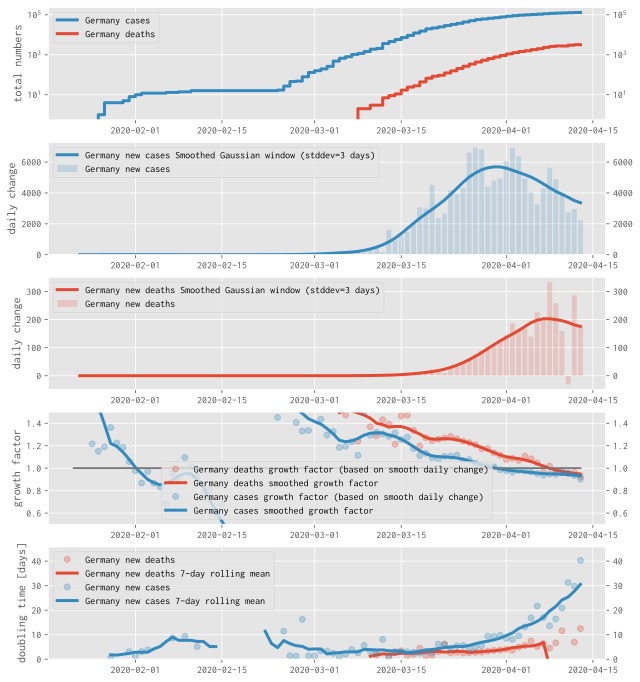

In [19]:
overview('Germany');

In [564]:
country = "Germany"
region, subregion = None, None
c, d = get_country_data(country, region=region, subregion=subregion)
c2 = c.drop(c[c.index < '2020-03-15'].index)
d2 = d.drop(d[d.index < '2020-03-15'].index)
c2.loc['2020-04-01'] =  np.nan # c2.loc['2020-03-31']
c2 = c2.dropna()

c2.country = country
c2 = c.drop(c[c.index < '2020-03-15'].index)
d2 = d.drop(d[d.index < '2020-03-15'].index)
c2.country = c.country
d2.country = d.country
c2.label = c.label
d2.label = d.label


In [561]:
def plot_doubling_time_dev(ax, series, color, minchange=10):
    # only keep values where there is a change of a minumum number
    sel = series.diff() <= minchange
    series.drop(series[sel].index, inplace=False)

    # we assume we have one value for every day - should check XXX
    q2_div_q1 = series.pct_change() + 1  # computes q2/q1
    q2_div_q1.replace(np.inf, np.nan, inplace=True)  # get rid of x/0 results
    q2_div_q1.dropna(inplace=True)
    dtime = double_time_exponential(q2_div_q1, t2_minus_t1=1)
    dtime.dropna(inplace=True)

    # exceptions:
    #
    # UK: data point on 15 March 2020 for only 1 new case, results in huge spike in doubling time (~790 days)
    # drop this
    if series.country == "United Kingdom" and series.label=="cases":
        # print(dtime)
        sel = dtime > 50
        dtime.drop(dtime[sel].index, inplace=True)
        print(f"Dropping UK data at {dtime[sel].index}, values are {dtime[sel]}")
    # end of exceptions

    label = series.country + " new " + series.label
    ax.plot(dtime.index, dtime.values, 'o', color=color, alpha=0.3, label=label)

    # need rolling average to smooth out weekly variations
    rolling = dtime.rolling(7, min_periods=1, center=True).mean()

    # good to take maximum value from here
    ymax = min(rolling.max()*1.5, 500)
    if np.isnan(ymax):
        # This happens is rolling is empty, for example for deaths in Austria, Singapore
        # print(f"Can't plot doublingtime line for {series.label} in {series.country} due to too small numbers")
        ymax = 10

    # some countries require special care
    if series.country == 'China':
            ymax = 100

    ax.set_ylim(0, ymax)
    ax.plot(dtime.index, rolling, "-", color=color, alpha=1.0, label=label + ' 7-day rolling mean',
            linewidth=LW)
    ax.legend()
    ax.set_ylabel("doubling time [days]")
    return ax, rolling, dtime



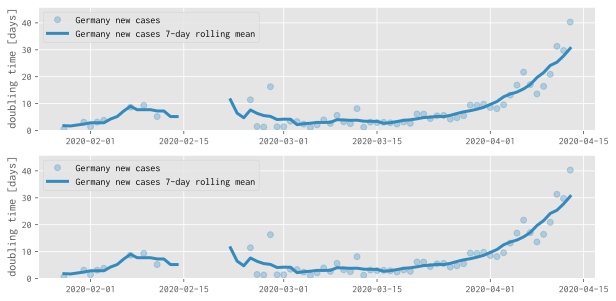

In [563]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), sharex=False)
ax = axes[0]
ax.set_ylim([-50, 200])
plot_doubling_time_dev(ax=ax, series=c2, color="C1");
ax = axes[1]
plot_doubling_time(ax=ax, series=c2, color="C1");


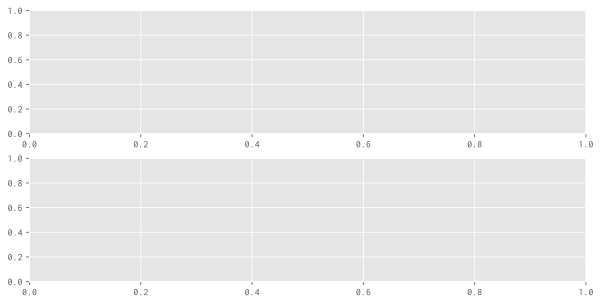

# Playground to explore different smoothing options

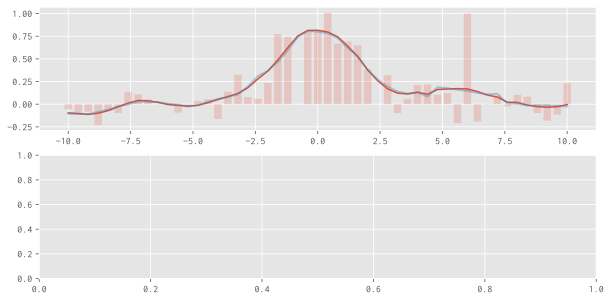

In [353]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), sharex=False)
ax = axes[0]
n = 51
x = np.linspace(-10, 10, n)
x0 = 0
sigma = 2
data = np.exp(-(x-x0)**2/sigma**2) + (np.random.uniform(size=n) - 0.5) * 0.5 

s = pd.Series(data=data, index=x)

s.iloc[n//2-2] = np.nan

s.iloc[n//2+15] = 1

ax.bar(s.index, s.values, alpha=0.2, width=0.3)
rgauss = s.rolling(7, center=True).mean()
rmean = s.rolling(7, center=True, win_type='gaussian', min_periods=1).mean(std=2)
rgauss = s.rolling(7, center=True, win_type='gaussian', min_periods=1).mean(std=3)
ax.plot(rmean.index, rmean.values, '-', label='box')
ax.plot(rgauss.index, rgauss.values, '-', linewidth=2, alpha=0.4, label='gaussian')

In [354]:
print("s     ", s.sum())
print("rmean ", rmean.sum())
print("gaus  ", rgauss.sum())


s      8.461840213623914
rmean  9.068316848398469
gaus   9.034355145596704


In [16]:
%run ../coronavirus.py
%run ../test_corona.py
cases, deaths = mock_get_country()
f, smooth = compute_growth_factor(cases)

In [17]:
sum(f[0].dropna()), sum(smooth[0])

(77.29126220750226, 78.5968805402061)

In [18]:
test_compute_growth_factor()

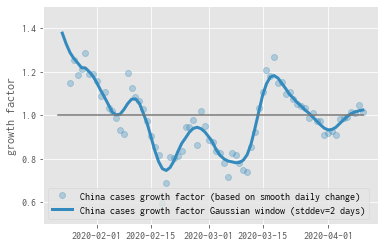

In [19]:
test_plot_growth_factor()